## Observations and Insights 
* We Calculated the Average Home Value of all the States in USA

* Import Dependencies

In [2]:
# Add All the Dependencies 
# Dependencies and Setup 
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')
import scipy.stats as stats
import requests
import json
from config import g_key
import gmaps

## Load CSV
* Retriving the Data from the CSV files and saving the to the Pandas Data Frame 

In [3]:
#Add the CSV file and Read the CSV File 
# File to Load 
home_value_data_to_load = "Resources/City_zhvi_uc_sfrcondo_tier_0.33_0.67_sm_sa_month.csv"

# Read rwa data File and store into Pandas DataFrames
home_value_raw = pd.read_csv(home_value_data_to_load)

home_value_raw.head()
home_value_raw.dropna()

,RegionID,SizeRank,RegionName,RegionType,StateName,State,Metro,CountyName,2000-01-31,2000-02-29,...,2021-06-30,2021-07-31,2021-08-31,2021-09-30,2021-10-31,2021-11-30,2021-12-31,2022-01-31,2022-02-28,2022-03-31
1,12447,1,Los Angeles,City,CA,CA,Los Angeles-Long Beach-Anaheim,Los Angeles County,237081.0,237303.0,...,876405.0,898997.0,912715.0,922531.0,925407.0,929815.0,935460.0,940493.0,949548.0,965684.0
5,13271,5,Philadelphia,City,PA,PA,Philadelphia-Camden-Wilmington,Philadelphia County,74090.0,74296.0,...,220046.0,222217.0,223519.0,224601.0,225639.0,226661.0,227568.0,227999.0,228386.0,228970.0
9,38128,9,Dallas,City,TX,TX,Dallas-Fort Worth-Arlington,Dallas County,120023.0,120188.0,...,264319.0,268627.0,275474.0,282030.0,287470.0,290457.0,293043.0,297630.0,304249.0,310959.0
11,33839,11,San Jose,City,CA,CA,San Jose-Sunnyvale-Santa Clara,Santa Clara County,390074.0,392423.0,...,1279505.0,1314873.0,1334680.0,1341153.0,1350065.0,1364412.0,1384118.0,1410373.0,1446272.0,1482586.0
12,25290,12,Jacksonville,City,FL,FL,Jacksonville,Duval County,102535.0,102847.0,...,235234.0,241092.0,246548.0,252408.0,257543.0,262803.0,267738.0,274072.0,280336.0,288061.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22351,54635,29449,Surfside Beach,City,TX,TX,Houston-The Woodlands-Sugar Land,Brazoria County,97557.0,97239.0,...,267191.0,277307.0,287933.0,297520.0,303525.0,307844.0,313145.0,318782.0,329546.0,337281.0
22363,24406,29449,Donnelsville,City,OH,OH,Springfield,Clark County,106200.0,107041.0,...,128682.0,130879.0,132434.0,133963.0,134914.0,137271.0,138536.0,139368.0,140059.0,141705.0
22385,46631,29449,Mount Charleston,City,NV,NV,Las Vegas-Henderson-Paradise,Clark County,405815.0,409704.0,...,565769.0,570760.0,571156.0,571980.0,576308.0,580838.0,583943.0,590635.0,600255.0,609026.0
22386,255422,29449,Clearview,City,WV,WV,Wheeling,Ohio County,75249.0,74413.0,...,161495.0,162750.0,163579.0,164509.0,165286.0,166459.0,170222.0,173662.0,177370.0,178542.0


## Pivot Date 

In [212]:
#Pivoted the table to narrow down the columns into date and price 
home_value_raw = pd.read_csv(home_value_data_to_load)
home_value_raw
home_value_unpivoted = home_value_raw.melt(id_vars=['RegionID', 'SizeRank', 'RegionName', 'RegionType', 'StateName',
       'State', 'Metro', 'CountyName'], var_name='Date', value_name='Price')
home_value_unpivoted.head(5)

,RegionID,SizeRank,RegionName,RegionType,StateName,State,Metro,CountyName,Date,Price
0,6181,0,New York,City,NY,NY,New York-Newark-Jersey City,Queens County,2000-01-31,252701.0
1,12447,1,Los Angeles,City,CA,CA,Los Angeles-Long Beach-Anaheim,Los Angeles County,2000-01-31,237081.0
2,39051,2,Houston,City,TX,TX,Houston-The Woodlands-Sugar Land,Harris County,2000-01-31,108945.0
3,17426,3,Chicago,City,IL,IL,Chicago-Naperville-Elgin,Cook County,2000-01-31,168395.0
4,6915,4,San Antonio,City,TX,TX,San Antonio-New Braunfels,Bexar County,2000-01-31,116080.0


## City Count

In [11]:
#Comparison by Cities for home values price by years
#We have this much of different cities data available 
city = home_value_unpivoted["RegionID"].nunique()
pd.DataFrame({'Total Cities': [city]})

,Total Cities
0,22397


## Top 5 States with Highest Average Home Value

In [211]:
#Average Pric By States
State_df = home_value_unpivoted.groupby(['State'])
States = State_df["State"].nunique()
Average =State_df["Price"].mean()

#Retrive the Top 5 States for Maximum Average value of the Home
State_df2 = pd.DataFrame({'Average Home Value': Average}).sort_values(['Average Home Value'], ascending=False)

State_df2.head(5)

,Average Home Value
State,
HI,532082.760968
CA,508746.625165
DC,460258.404494
NJ,387152.208612
MA,372868.677718


## Bar Graph of top 5 states

Text(4.75, 0.5, 'Average Home Value')

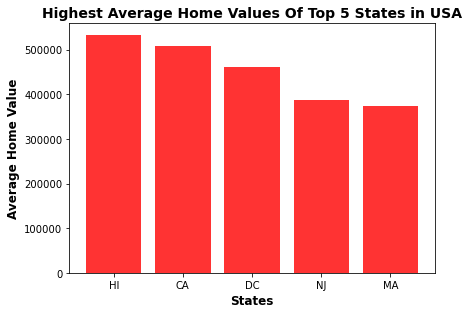

In [13]:
#Comparing Top 5 cities with Highest Average home Value
x_axis = np.arange(len(State_df2.head(5)))
x_axis
plt.bar(x_axis, State_df2["Average Home Value"].head(5), color='r', alpha = 0.8, align = "center")

#Tick locations will assign the name for x_axis
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, State_df2.index[0:5])
plt.tight_layout()

plt.title("Highest Average Home Values Of Top 5 States in USA",fontsize=14, fontweight='bold')
plt.xlabel("States", fontsize=12,fontweight='bold')
plt.ylabel("Average Home Value",fontsize=12, fontweight='bold')

## Comparion By Year 

In [209]:
# Retrieve the Year from the date format and Compare by 3 different recent year
#now = datetime.now().strftime("%Y-%m-%d %H:%M:%S.%f")
#now2 = home_value_unpivoted.["date"].strftime("%Y")
home_value_unpivoted["Date"] = pd.to_datetime(home_value_unpivoted['Date'])
home_value_unpivoted["Year"] = home_value_unpivoted["Date"].dt.strftime("%Y")
home_value_unpivoted.head()


,RegionID,SizeRank,RegionName,RegionType,StateName,State,Metro,CountyName,Date,Price,Year
0,6181,0,New York,City,NY,NY,New York-Newark-Jersey City,Queens County,2000-01-31,252701.0,2000
1,12447,1,Los Angeles,City,CA,CA,Los Angeles-Long Beach-Anaheim,Los Angeles County,2000-01-31,237081.0,2000
2,39051,2,Houston,City,TX,TX,Houston-The Woodlands-Sugar Land,Harris County,2000-01-31,108945.0,2000
3,17426,3,Chicago,City,IL,IL,Chicago-Naperville-Elgin,Cook County,2000-01-31,168395.0,2000
4,6915,4,San Antonio,City,TX,TX,San Antonio-New Braunfels,Bexar County,2000-01-31,116080.0,2000


## Year and State Count

In [210]:
#Got the unique years of the data for line graph comparision between the 3 different years 
year = home_value_unpivoted["Year"].nunique()
print(pd.DataFrame({'Total Years of Data': [year]}))

#Printed Total number of unique states 
state = home_value_unpivoted["State"].nunique()
print(pd.DataFrame({'Total States': [state]}))


   Total Years of Data
0                   23
   Total States
0            51


In [61]:
# Data Frame Of the Average Home Value of all the states in 2020, 2021 and 2022 in all the states
Avg_Year_df = home_value_unpivoted[pd.to_numeric(home_value_unpivoted["Year"]) >= 2020]
Avg_Year_df.dropna()

,RegionID,SizeRank,RegionName,RegionType,StateName,State,Metro,CountyName,Date,Price,Year
5375280,6181,0,New York,City,NY,NY,New York-Newark-Jersey City,Queens County,2020-01-31,685388.0,2020
5375281,12447,1,Los Angeles,City,CA,CA,Los Angeles-Long Beach-Anaheim,Los Angeles County,2020-01-31,737887.0,2020
5375282,39051,2,Houston,City,TX,TX,Houston-The Woodlands-Sugar Land,Harris County,2020-01-31,194475.0,2020
5375283,17426,3,Chicago,City,IL,IL,Chicago-Naperville-Elgin,Cook County,2020-01-31,263693.0,2020
5375284,6915,4,San Antonio,City,TX,TX,San Antonio-New Braunfels,Bexar County,2020-01-31,211742.0,2020
...,...,...,...,...,...,...,...,...,...,...,...
5979990,45716,29449,Henderson,City,IL,IL,Galesburg,Knox County,2022-03-31,87445.0,2022
5979991,9618,29449,Harrisville,City,NY,NY,Ogdensburg-Massena,Saint Lawrence County,2022-03-31,112740.0,2022
5979992,17064,29449,Bloomdale,City,OH,OH,Toledo,Wood County,2022-03-31,101595.0,2022
5979993,236350,29449,Palisades,City,TX,TX,Amarillo,Randall County,2022-03-31,197254.0,2022


## Comparision of Average Home value of most reacent 3 Years

In [97]:
#This Command Group by the State and Year to get the unique state and year and get the mean of the price 
avg_state = Avg_Year_df.groupby(["State" , "Year"])["Price"].mean()
# This the unstack command to convert the Multiple Index Series into a dataframe 
Avg_State_Clean_df = avg_state.unstack(level=1)

Avg_State_Clean_df.head()


Year,2020,2021,2022
State,,,
AK,249681.206019,260962.592760,271430.409091
AL,131328.938561,146046.134098,160683.814887
AR,104675.209229,115000.756500,126387.450231
AZ,252134.621387,310230.824821,356983.082090
CA,636288.401246,731424.126608,809495.779004


## Bar graph of Average Home price of all States in Year 2022

Text(0, 0.5, 'Average Home Value')

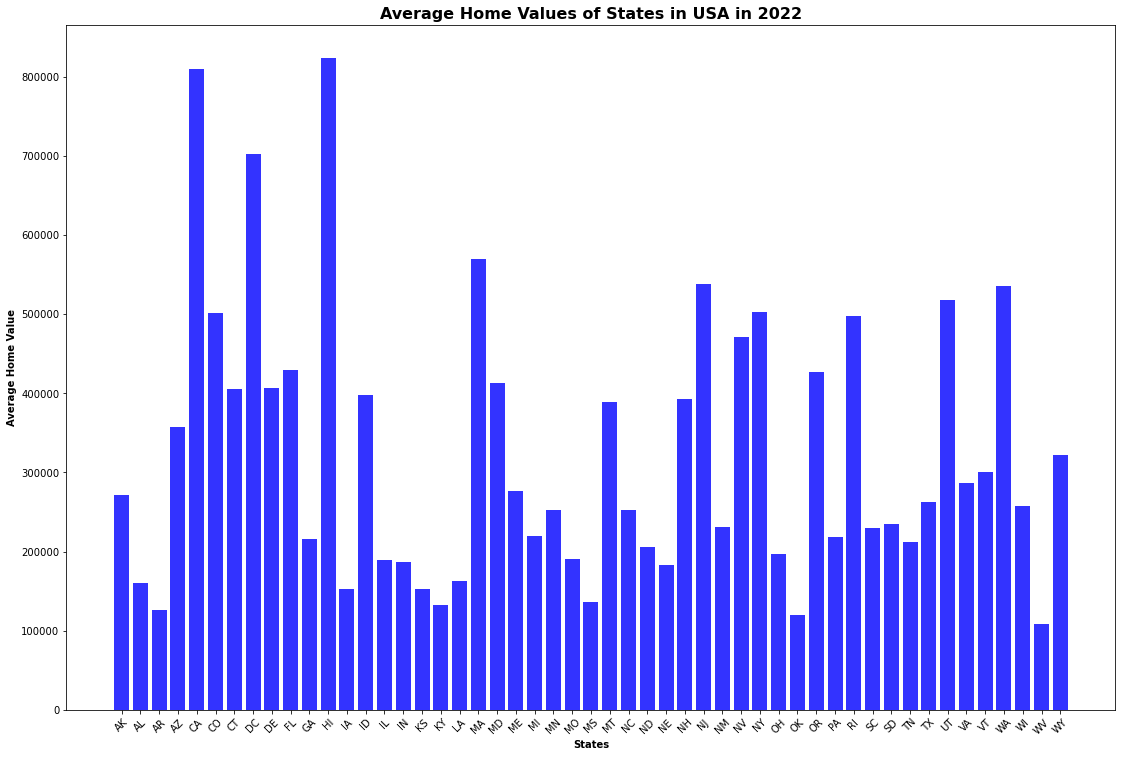

In [163]:
#Create the bar graph of the Year 2022 Average home value where all the sates are been listed 
x_axis = np.arange(len(Avg_State_Clean_df))
x_axis
plt.figure(figsize=(18.8,12.6))
plt.bar(x_axis, Avg_State_Clean_df["2022"], color='b', alpha = 0.8, align = "center")

#Tick locations will assign the name for x_axis
tick = [value for value in x_axis]
plt.xticks(tick,list(Avg_State_Clean_df.index[0:]))
plt.xticks(rotation=45)
plt.title("Average Home Values of States in USA in 2022",fontsize=16, fontweight='bold')
plt.xlabel("States", fontsize=10,fontweight='bold')
plt.ylabel("Average Home Value",fontsize=10, fontweight='bold')

## Comparing Last 3 year average price in CALIFORNIA

In [207]:
# This is the Command That Perform Compqation for Aerage price of Home Values in Past 3 Years 
ca_city_df = Avg_State_Clean_df.loc[Avg_State_Clean_df.index[4]]
ca_city_df

Year
2020    636288.401246
2021    731424.126608
2022    809495.779004
Name: CA, dtype: float64

## Pie Chart for Comparing the average value in California

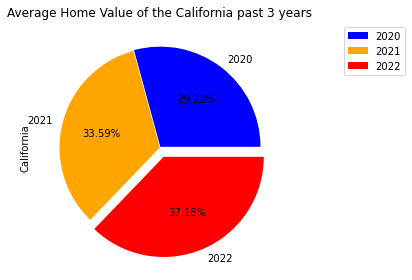

In [208]:
#Created The Pie Chart For Campoaring Average Home Price in Califormia Past 3 Years
explode=(0.01 , 0, 0.1)
colors = ["blue", "orange", "red"]
labels = ["2020", "2021", "2022"]
plt.pie(ca_city_df, explode=explode, colors=colors, labels=labels, autopct="%1.2f%%")
plt.title("Average Home Value of the California past 3 years")
plt.ylabel("California")
plt.legend(labels, loc="upper right", frameon=True, bbox_to_anchor=(1.5,1))
#plt.savefig('pyplot_piechart')
plt.tight_layout()
plt.show()